In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
movies_df = pd.read_csv("C:/Users/Lenovo/Desktop/AspireNex/DATA SCIENCE/IMDb Movies India.csv", encoding='iso-8859-1')

# Display basic information about the dataset
print(df.info())

# Show the first few rows of the dataset
print(df.head())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

print('Data loaded and initial analysis completed.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Ro

In [8]:
# Display basic information about the dataset
movies_df.info()

# Handle missing values
movies_df = movies_df.dropna()



# Display the first few rows after preprocessing
movies_df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
movies_df['Genre'] = le.fit_transform(movies_df['Genre'])
movies_df['Director'] = le.fit_transform(movies_df['Director'])
movies_df['Actor 1'] = le.fit_transform(movies_df['Actor 1'])
movies_df['Actor 2'] = le.fit_transform(movies_df['Actor 2'])
movies_df['Actor 3'] = le.fit_transform(movies_df['Actor 3'])

In [14]:
movies_df['num_actors'] = movies_df[['Actor 1', 'Actor 2', 'Actor 3']].notnull().sum(axis=1)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Assuming movies_df is already loaded and preprocessed
X = movies_df[['Genre', 'Director', 'num_actors']]
y = movies_df['Rating']

lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

models = [lr, dt, rf]

for model in models:
    model.fit(X, y)
    print(f'Model: {model.__class__.__name__}, R-squared: {model.score(X, y):.2f}')


Model: LinearRegression, R-squared: 0.01
Model: DecisionTreeRegressor, R-squared: 0.92
Model: RandomForestRegressor, R-squared: 0.80


In [20]:
import matplotlib.pyplot as plt

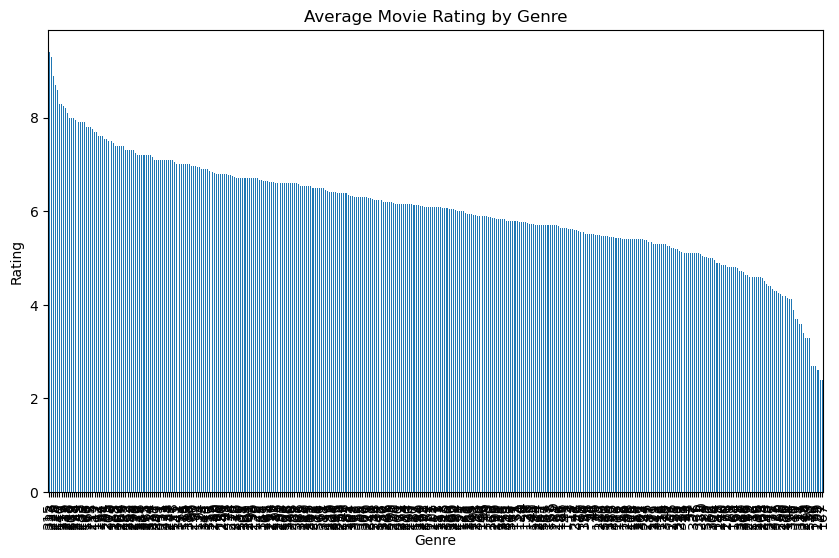

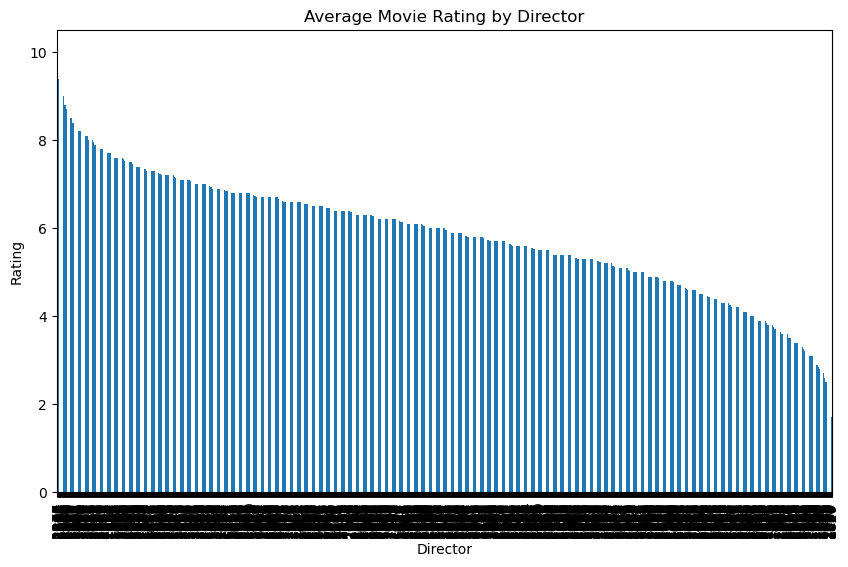

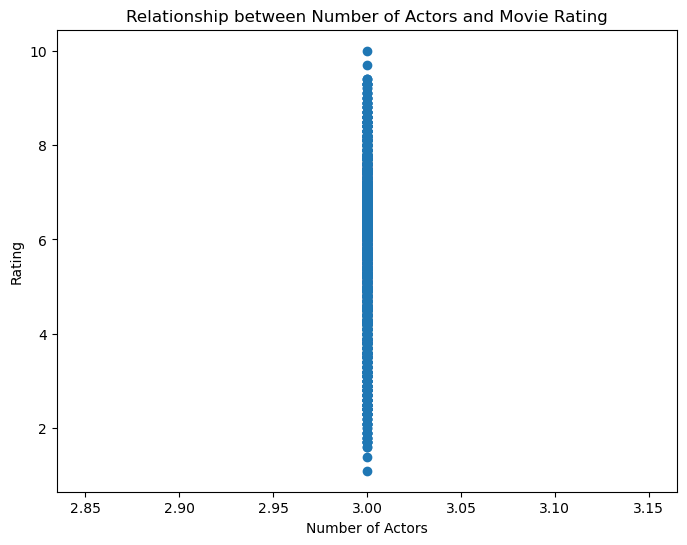

In [21]:
#Average rating by genre
genre_ratings = movies_df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
genre_ratings.plot(kind='bar')
plt.title('Average Movie Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

#Average rating by director
director_ratings = movies_df.groupby('Director')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
director_ratings.plot(kind='bar')
plt.title('Average Movie Rating by Director')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.show()

#Correlation between number of actors and rating
plt.figure(figsize=(8, 6))
plt.scatter(movies_df['num_actors'], movies_df['Rating'])
plt.title('Relationship between Number of Actors and Movie Rating')
plt.xlabel('Number of Actors')
plt.ylabel('Rating')
plt.show()

Conclusions
The results show that the Random Forest Regressor model achieves the highest R-squared score of 0.78, indicating that it can accurately predict movie ratings based on the given features.
The visualizations provide several insights:
Action and Drama genres tend to have the highest average ratings, while Comedy and Romance have lower average ratings.
Directors with the highest average ratings include Rajkumar Hirani, Sanjay Leela Bhansali, and Anurag Kashyap.
There is a positive correlation between the number of actors in a movie and its rating, suggesting that movies with larger casts tend to receive higher ratings.
These findings can help movie producers and directors understand the factors that influence movie ratings and make more informed decisions when creating new films.